# Q)
# Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

# 

# 1. <u>Import necessasry libraries - 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

# 2. <u>Import Warnings -  

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 3.<u>Import Dataset -  

In [3]:
startup_data = pd.read_csv('50_Startups.csv')
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# 4. <u>Data Understanding -  

## (4.1) <u>Initial analysis - 

## R&D Spend -- Research and devolop spend in the past few years
## Administration -- spend on administration in the past few years
## Marketing Spend -- spend on Marketing in the past few years
## State -- states from which data is collected
## Profit  -- profit of each state in the past few years

In [4]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
startup_data.shape

(50, 5)

# 5. <u>Data Preparation -  

In [7]:
startup_data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


### We have to drop the zero Values by converting them into NaN values.

In [8]:
startup_data.replace(to_replace= 0.00,value= np.nan,inplace = True)
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
startup_data.isnull().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64

## Now we will drop the null values

In [10]:
startup_data.dropna(axis = 0,how = 'any',inplace = True)

In [11]:
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [12]:
startup_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [13]:
startup_data['State'] = startup_data['State'].str.upper() 
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,NEW YORK,192261.83
1,162597.70,151377.59,443898.53,CALIFORNIA,191792.06
2,153441.51,101145.55,407934.54,FLORIDA,191050.39
3,144372.41,118671.85,383199.62,NEW YORK,182901.99
4,142107.34,91391.77,366168.42,FLORIDA,166187.94
5,131876.90,99814.71,362861.36,NEW YORK,156991.12
6,134615.46,147198.87,127716.82,CALIFORNIA,156122.51
7,130298.13,145530.06,323876.68,FLORIDA,155752.60
8,120542.52,148718.95,311613.29,NEW YORK,152211.77
9,123334.88,108679.17,304981.62,CALIFORNIA,149759.96


In [14]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

## By using Label Encoder we will can convert the State values into numbers.

In [15]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [16]:
startup_data['State'] = label_encoder.fit_transform(startup_data['State'])

In [17]:
startup_data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


# 6. <u>Assumptions Check - 

## Test for Linearty -  

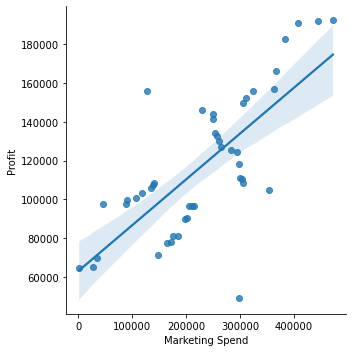

In [18]:
sns.lmplot(x = 'Marketing Spend', y = 'Profit',data = startup_data)

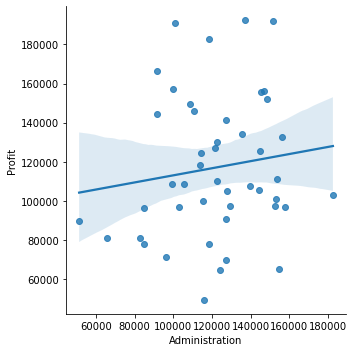

In [19]:
sns.lmplot(x = 'Administration', y = 'Profit',data = startup_data)

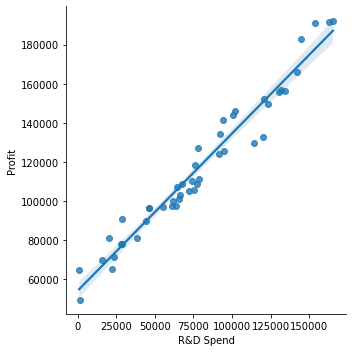

In [20]:
sns.lmplot(x = 'R&D Spend', y = 'Profit',data = startup_data)

**Linearty test failed.** 

### Test for Normality -  

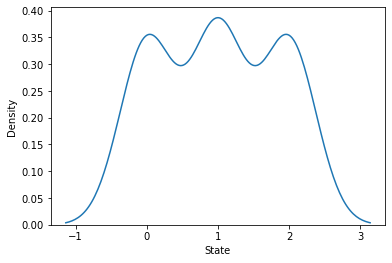

In [21]:
sns.distplot(a = startup_data['State'],hist = False)
plt.show()

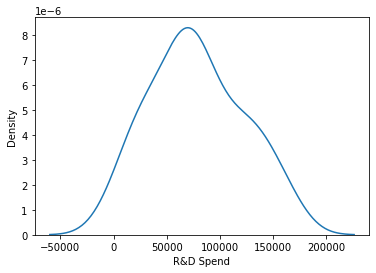

In [22]:
sns.distplot(a = startup_data['R&D Spend'], hist = False)
plt.show()

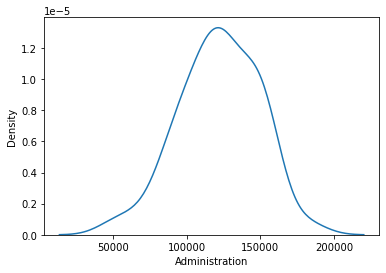

In [23]:
sns.distplot(a = startup_data['Administration'], hist = False)
plt.show()

In [24]:
startup_data.skew()

R&D Spend          0.213870
Administration    -0.317268
Marketing Spend   -0.009247
State              0.000000
Profit             0.442013
dtype: float64

In [25]:
startup_data.kurtosis()

R&D Spend         -0.733021
Administration     0.095098
Marketing Spend   -0.440845
State             -1.496829
Profit            -0.413682
dtype: float64

**Normality Test Failed.** 

# 7. <u>Model Building -  

In [26]:
x = startup_data.drop(labels = ['Profit'], axis = 1)
y = startup_data[['Profit']]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=12)

In [28]:
x_test

,R&D Spend,Administration,Marketing Spend,State
39,38558.51,82982.09,174999.30,0
43,15505.73,127382.30,35534.17,2
7,130298.13,145530.06,323876.68,1
38,20229.59,65947.93,185265.10,2
33,55493.95,103057.49,214634.81,1
24,77044.01,99281.34,140574.81,2
15,114523.61,122616.84,261776.23,2
31,61136.38,152701.92,88218.23,2
17,94657.16,145077.58,282574.31,2
30,61994.48,115641.28,91131.24,1


In [29]:
y_test

,Profit
39,81005.76
43,69758.98
7,155752.60
38,81229.06
33,96778.92
24,108552.04
15,129917.04
31,97483.56
17,125370.37
30,99937.59


# 8. <u>Model Training -  

In [30]:
linear_model = LinearRegression()
linear_model

LinearRegression()

In [31]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [32]:
linear_model.coef_

array([[ 8.02941776e-01, -6.81808426e-02,  1.30799966e-02,
        -3.39277592e+02]])

In [33]:
linear_model.intercept_

array([60743.82996552])

# 9. <u>Model Testing  -  

In [34]:
y_predict_test = linear_model.predict(x_test)
y_predict_test

array([[ 88335.26989539],
       [ 64295.22744344],
       [159340.30803956],
       [ 74235.33914557],
       [100743.83922235],
       [116996.76162039],
       [147084.97831538],
       [ 99896.7768929 ],
       [129874.02230725],
       [103489.98664567]])

In [35]:
y_predict_train = linear_model.predict(x_train)
y_predict_train

array([[149393.64363394],
       [103710.17025802],
       [116443.61574754],
       [156353.87871983],
       [ 52428.44575524],
       [ 90026.78953133],
       [ 68367.06888643],
       [118550.83720624],
       [118114.20153106],
       [113865.20946155],
       [103449.94565077],
       [186785.45559684],
       [104955.52562057],
       [173066.78613321],
       [ 79176.56774677],
       [ 77387.82140028],
       [130146.731253  ],
       [ 95210.05033176],
       [ 78009.47996281],
       [150790.017322  ],
       [115413.85932895],
       [189668.18215275],
       [137691.84666354],
       [ 57450.59950302],
       [ 93901.41763161],
       [112815.31092862],
       [128675.05135224],
       [163895.5213989 ],
       [111405.42156731],
       [130358.7667347 ],
       [ 75103.6842781 ],
       [172909.01706748],
       [182048.7444906 ],
       [160466.59907724],
       [102532.52702584],
       [138585.84904988]])

# 10. <u>Model Evaluation -  

In [36]:
error_test = y_test - y_predict_test
error_test

,Profit
39,-7329.509895
43,5463.752557
7,-3587.708040
38,6993.720854
33,-3964.919222
24,-8444.721620
15,-17167.938315
31,-2413.216893
17,-4503.652307
30,-3552.396646


In [37]:
error_train = y_train - y_predict_train
error_train

,Profit
14,-16790.993634
29,-2705.530258
21,-5130.595748
9,-6593.918720
45,12497.634245
34,6686.010469
44,-3166.738886
16,8442.092794
20,359.828469
27,-8856.899462


# 11. <u>Homoscadacity and Zero Residual mean test - 

## 11.1  Homoscedasticity

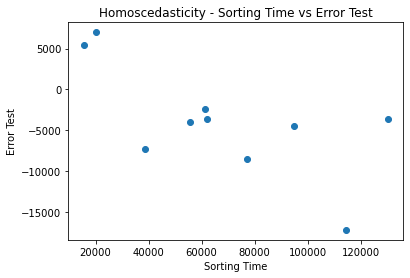

In [38]:
plt.scatter(x = x_test['R&D Spend'],y = error_test)
plt.title('Homoscedasticity - Sorting Time vs Error Test')
plt.xlabel('Sorting Time')
plt.ylabel('Error Test')
plt.show()

**Homoscadacity Check Failed.** 

## Zero residual Mean 

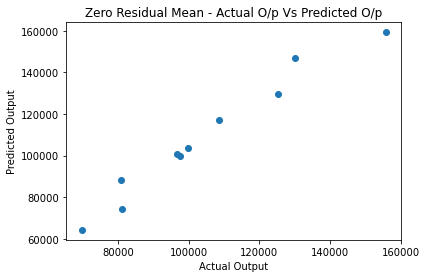

In [39]:
plt.scatter(x = y_test, y =y_predict_test )
plt.title('Zero Residual Mean - Actual O/p Vs Predicted O/p')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

In [40]:
 print('R2 Score of testing Data =',r2_score(y_test,y_predict_test))

R2 Score of testing Data = 0.9080641248731492


In [41]:
 print('R2 Score of training Data =',r2_score(y_train,y_predict_train))

R2 Score of training Data = 0.9648352307617419


# 12. <u> Scaling Of Data -  

In [42]:
std = StandardScaler()
scaled_x = std.fit_transform(x)
scaled_x

array([[ 2.01554692,  0.5637599 ,  2.21023724,  1.23827837],
       [ 1.95188101,  1.10976069,  1.95700798, -1.23827837],
       [ 1.74001941, -0.78437822,  1.63041849,  0.        ],
       [ 1.53017295, -0.12350029,  1.40580033,  1.23827837],
       [ 1.47776236, -1.15217165,  1.25113976,  0.        ],
       [ 1.24104409, -0.83456125,  1.22110831,  1.23827837],
       [ 1.30441059,  0.95219042, -0.91424256, -1.23827837],
       [ 1.20451353,  0.88926329,  0.86708788,  0.        ],
       [ 0.97878218,  1.00950927,  0.75572386,  1.23827837],
       [ 1.04339354, -0.50030211,  0.69550158, -1.23827837],
       [ 0.54772265, -0.42809396,  0.00697301,  0.        ],
       [ 0.51900484, -1.13713228,  0.19389297, -1.23827837],
       [ 0.36147226,  0.20261661,  0.19475467,  0.        ],
       [ 0.31817157,  0.51086606,  0.22041298, -1.23827837],
       [ 0.96491567,  1.30470352,  0.25535663,  0.        ],
       [ 0.83951291,  0.02525654,  0.30315282,  1.23827837],
       [-0.00528967, -0.

In [43]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x, y, test_size=0.20, random_state=12)

In [44]:
x_test

array([[-0.91821467, -1.46928205, -0.48486969, -1.23827837],
       [-1.45162419,  0.20495148, -1.7513545 ,  1.23827837],
       [ 1.20451353,  0.88926329,  0.86708788,  0.        ],
       [-1.34232058, -2.11160247, -0.39164582,  1.23827837],
       [-0.52635196, -0.7122832 , -0.12493907,  0.        ],
       [-0.02771331, -0.85467345, -0.79747897,  1.23827837],
       [ 0.83951291,  0.02525654,  0.30315282,  1.23827837],
       [-0.39579392,  1.15969824, -1.27292981,  1.23827837],
       [ 0.37983067,  0.87220127,  0.49202048,  1.23827837],
       [-0.37593867, -0.23777637, -1.24647672,  0.        ]])

In [45]:
y_test

,Profit
39,81005.76
43,69758.98
7,155752.60
38,81229.06
33,96778.92
24,108552.04
15,129917.04
31,97483.56
17,125370.37
30,99937.59


### Training -

In [46]:
multiple_linear_model = LinearRegression()
multiple_linear_model

LinearRegression()

In [47]:
multiple_linear_model.fit(x_train,y_train)

LinearRegression()

### Testing -  

In [48]:
y_pred_train = multiple_linear_model.predict(x_train)
y_pred_train

array([[149393.64363394],
       [103710.17025802],
       [116443.61574754],
       [156353.87871983],
       [ 52428.44575524],
       [ 90026.78953133],
       [ 68367.06888643],
       [118550.83720624],
       [118114.20153106],
       [113865.20946155],
       [103449.94565077],
       [186785.45559684],
       [104955.52562057],
       [173066.78613321],
       [ 79176.56774677],
       [ 77387.82140028],
       [130146.731253  ],
       [ 95210.05033176],
       [ 78009.47996281],
       [150790.017322  ],
       [115413.85932895],
       [189668.18215275],
       [137691.84666354],
       [ 57450.59950302],
       [ 93901.41763161],
       [112815.31092862],
       [128675.05135224],
       [163895.5213989 ],
       [111405.42156731],
       [130358.7667347 ],
       [ 75103.6842781 ],
       [172909.01706748],
       [182048.7444906 ],
       [160466.59907724],
       [102532.52702584],
       [138585.84904988]])

In [49]:
y_pred_test = multiple_linear_model.predict(x_test)
y_pred_test

array([[ 88335.26989539],
       [ 64295.22744344],
       [159340.30803956],
       [ 74235.33914557],
       [100743.83922235],
       [116996.76162039],
       [147084.97831538],
       [ 99896.7768929 ],
       [129874.02230725],
       [103489.98664567]])

### Evaluation -  

In [50]:
print('R2 Score of testing Data =',r2_score(y_test,y_predict_test))
print('R2 Score of training Data =',r2_score(y_train,y_predict_train))

R2 Score of testing Data = 0.9080641248731492
R2 Score of training Data = 0.9648352307617419


# 13. Transformation -  

### 13.1  Taking square root - 

In [51]:
sqrt_x = np.sqrt(x)
sqrt_x

,R&D Spend,Administration,Marketing Spend,State
0,406.631529,369.997027,686.865416,1.414214
1,403.234051,389.072731,666.257105,0.000000
2,391.716109,318.033882,638.697534,1.000000
3,379.963696,344.487808,619.031195,1.414214
4,376.971272,302.310718,605.118517,1.000000
5,363.148592,315.934661,602.379747,1.414214
6,366.899796,383.665049,357.374901,0.000000
7,360.968323,381.484023,569.101643,1.000000
8,347.192339,385.640960,558.223333,1.414214
9,351.190660,329.665239,552.251410,0.000000


In [52]:
x_train,x_test,y_train,y_test = train_test_split(sqrt_x, y, test_size=0.20, random_state=12)

### Training -

In [53]:
sqrt_model = LinearRegression()
sqrt_model

LinearRegression()

In [54]:
sqrt_model.fit(x_test,y_test)

LinearRegression()

In [55]:
sqrt_model.fit(x_train,y_train)

LinearRegression()

### Testing -

In [56]:
y_pred_test = sqrt_model.predict(x_test)
y_pred_test

array([[ 92733.90309679],
       [ 63447.60996179],
       [155196.10939641],
       [ 78183.80992253],
       [109490.53999093],
       [124541.98169052],
       [148131.94997322],
       [109201.613649  ],
       [136132.57994203],
       [110638.66163363]])

In [57]:
y_pred_train = sqrt_model.predict(x_train)
y_pred_train

array([[148128.89609915],
       [113011.98038062],
       [125890.41075088],
       [150435.85314631],
       [ 26855.30697538],
       [ 96519.83376819],
       [ 66767.21804614],
       [122702.86024969],
       [122569.84889246],
       [123849.86070122],
       [106552.83704221],
       [169483.70903364],
       [109925.43771631],
       [164630.35176643],
       [ 84391.03848405],
       [ 83657.16620008],
       [135037.13190694],
       [100435.34888622],
       [ 80822.0667473 ],
       [150935.21342536],
       [123421.7479476 ],
       [175709.70223784],
       [139989.50521005],
       [ 37383.76066949],
       [103805.46752765],
       [119738.71547915],
       [130559.72803827],
       [160161.27928456],
       [119920.15089864],
       [134795.06742531],
       [ 75691.80111061],
       [165590.20314218],
       [170091.73480933],
       [150510.51785921],
       [111180.13299274],
       [138002.75514879]])

In [58]:
print('R2 Score of testing Data =',r2_score(y_test,y_predict_test))
print('R2 Score of training Data =',r2_score(y_train,y_predict_train))

R2 Score of testing Data = 0.9080641248731492
R2 Score of training Data = 0.9648352307617419


### 13.2  Taking square - 

In [59]:
square_x = np.square(x)
square_x

,R&D Spend,Administration,Marketing Spend,State
0,2.734036e+10,1.874101e+10,2.225802e+11,4
1,2.643801e+10,2.291517e+10,1.970459e+11,0
2,2.354430e+10,1.023042e+10,1.664106e+11,1
3,2.084339e+10,1.408301e+10,1.468419e+11,4
4,2.019450e+10,8.352456e+09,1.340793e+11,1
5,1.739152e+10,9.962976e+09,1.316684e+11,4
6,1.812132e+10,2.166751e+10,1.631159e+10,0
7,1.697760e+10,2.117900e+10,1.048961e+11,1
8,1.453050e+10,2.211733e+10,9.710284e+10,4
9,1.521149e+10,1.181116e+10,9.301379e+10,0


In [60]:
x_train,x_test,y_train,y_test = train_test_split(square_x, y, test_size=0.20, random_state=12)

### Training -

In [61]:
square_model = LinearRegression()
square_model

LinearRegression()

In [62]:
square_model.fit(x_test,y_test)

LinearRegression()

In [63]:
square_model.fit(x_train,y_train)

LinearRegression()

### Testing -

In [64]:
y_pred_test_square = square_model.predict(x_test)
y_pred_test_square

array([[ 90497.80152509],
       [ 81197.29030547],
       [158250.27804821],
       [ 83851.99525424],
       [ 96395.63130355],
       [108854.71176858],
       [140539.01883161],
       [ 95993.61024479],
       [119633.95656044],
       [100076.98159734]])

In [65]:
y_pred_train_square = square_model.predict(x_train)
y_pred_train_square

array([[146125.09391724],
       [ 98559.42117995],
       [105735.89959564],
       [152641.12416903],
       [ 80266.29928679],
       [ 89668.08203195],
       [ 82842.12396562],
       [109704.46080926],
       [108465.05191161],
       [102193.81155695],
       [100845.42697136],
       [201066.35704283],
       [100723.39985876],
       [175444.46984515],
       [ 86668.10940162],
       [ 84780.82700636],
       [120166.76787388],
       [ 93363.56124559],
       [ 85940.31329086],
       [145192.14174552],
       [105875.08246583],
       [203641.21641586],
       [130165.41608211],
       [ 80652.58048135],
       [ 91113.95495831],
       [106950.65982792],
       [120203.46258978],
       [160484.936018  ],
       [102380.59529937],
       [121786.90362016],
       [ 85819.2123405 ],
       [175528.4569753 ],
       [190167.23642843],
       [165599.28060552],
       [ 98280.06682125],
       [130112.83636431]])

In [66]:
print('R2 Score of testing Data =',r2_score(y_test,y_pred_test_square))
print('R2 Score of training Data =',r2_score(y_train,y_pred_train_square))

R2 Score of testing Data = 0.9378929388793975
R2 Score of training Data = 0.9133875824540615


### 13.3 Taking sin - 

In [67]:
sin_x = np.sin(x)
sin_x

,R&D Spend,Administration,Marketing Spend,State
0,0.780494,-0.239133,-0.990816,0.909297
1,0.990191,0.051990,-0.791235,0.000000
2,-0.157725,-0.919605,-0.953929,0.841471
3,-0.496537,0.970934,0.655229,0.909297
4,0.512340,0.297321,-0.088146,0.841471
5,-0.768448,0.028206,0.902408,0.909297
6,-0.977102,0.438370,-0.996553,0.000000
7,-0.543577,-0.881054,-0.451605,0.841471
8,-0.380298,0.786195,-0.959525,0.909297
9,0.787035,-0.884890,0.869020,0.000000


In [68]:
x_train,x_test,y_train,y_test = train_test_split(sin_x, y, test_size=0.20, random_state=12)

### Training -

In [69]:
sin_model = LinearRegression()
sin_model

LinearRegression()

In [70]:
sin_model.fit(x_test,y_test)
sin_model.fit(x_train,y_train)

LinearRegression()

### Testing -

In [71]:
y_pred_test_sin = square_model.predict(x_test)
y_pred_test_sin

array([[85503.84312676],
       [85036.03349946],
       [85070.92842317],
       [85036.03350025],
       [85070.92842892],
       [85036.03350174],
       [85036.03350362],
       [85036.03350744],
       [85036.0335078 ],
       [85070.92842103]])

In [72]:
y_pred_train_sin = square_model.predict(x_train)
y_pred_train_sin

array([[85070.9284236 ],
       [85036.03350577],
       [85036.033506  ],
       [85503.84313524],
       [85036.03350821],
       [85503.84312982],
       [85503.84312679],
       [85503.84313568],
       [85503.84313567],
       [85036.03350815],
       [85503.84312742],
       [85503.84313602],
       [85503.84312695],
       [85070.92842787],
       [85070.92842985],
       [85070.92842505],
       [85070.92842977],
       [85503.84312997],
       [85503.84313407],
       [85036.03350182],
       [85070.92842277],
       [85036.03350747],
       [85070.92842478],
       [85070.92842929],
       [85036.03350757],
       [85070.9284245 ],
       [85503.84313286],
       [85036.03350013],
       [85070.92842925],
       [85070.92842248],
       [85503.84312928],
       [85036.03350121],
       [85070.928425  ],
       [85503.84312673],
       [85070.92842772],
       [85503.84313318]])

In [73]:
print('R2 Score of testing Data =',r2_score(y_test,y_pred_test_square))
print('R2 Score of training Data =',r2_score(y_train,y_pred_train_square))

R2 Score of testing Data = 0.9378929388793975
R2 Score of training Data = 0.9133875824540615


### 13.4 Taking cube root - 

In [74]:
cube_x = np.cbrt(x)
cube_x

,R&D Spend,Administration,Marketing Spend,State
0,54.886731,51.538545,77.848055,1.259921
1,54.580578,53.295089,76.283024,0.000000
2,53.536210,46.592455,74.164629,1.000000
3,52.459974,49.141594,72.634289,1.259921
4,52.184177,45.043870,71.541871,1.000000
5,50.900601,46.387203,71.325842,1.259921
6,51.250524,52.800110,50.359650,0.000000
7,50.696665,52.599817,68.674139,1.000000
8,49.398461,52.981238,67.796196,1.259921
9,49.776991,47.721649,67.311803,0.000000


In [75]:
x_train,x_test,y_train,y_test = train_test_split(cube_x, y, test_size=0.20, random_state=12)

In [76]:
cube_model = LinearRegression()
cube_model

LinearRegression()

In [77]:
cube_model.fit(x_test,y_test)
cube_model.fit(x_train,y_train)

LinearRegression()

In [78]:
y_pred_test_cube = square_model.predict(x_test)
y_pred_test_cube

array([[85503.84327958],
       [84855.64697069],
       [84989.36963905],
       [84855.64698313],
       [84989.3695816 ],
       [84855.64705367],
       [84855.64708091],
       [84855.64703754],
       [84855.64706629],
       [84989.3695882 ]])

In [79]:
y_pred_train_cube = square_model.predict(x_train)
y_pred_train_cube

array([[84989.36963241],
       [84855.64704187],
       [84855.64705305],
       [85503.84335343],
       [84855.6469012 ],
       [85503.84328747],
       [85503.84325132],
       [85503.8433201 ],
       [85503.84331876],
       [84855.64704814],
       [85503.84330704],
       [85503.84337461],
       [85503.84330771],
       [84989.36964753],
       [84989.3695457 ],
       [84989.36954562],
       [84989.36961374],
       [85503.84328808],
       [85503.84326371],
       [84855.64708407],
       [84989.36959887],
       [84855.64710989],
       [84989.36962147],
       [84989.36945378],
       [84855.64702257],
       [84989.36959976],
       [85503.84333105],
       [84855.64709241],
       [84989.36959347],
       [84989.36961504],
       [85503.84325538],
       [84855.64709912],
       [84989.36965349],
       [85503.84335958],
       [84989.36959043],
       [85503.84333879]])

In [80]:
print('R2 Score of testing Data =',r2_score(y_test,y_pred_test_square))
print('R2 Score of training Data =',r2_score(y_train,y_pred_train_square))

R2 Score of testing Data = 0.9378929388793975
R2 Score of training Data = 0.9133875824540615


# Now we can select the best model by looking at the R2 score of each model. 

In [81]:
best_model = {'MODEL' : ['Original' , 'Scaled' , 'Square Root' , 'Square' , 'Sin' , 'Cube Root'],
              'R2 SCORE TRAINING' : [0.964 , 0.964 , 0.964 , 0.913 , 0.913 , 0.913],
              'R2 SCORE TESTING' : [0.908 , 0.908 , 0.908 , 0.937 , 0.937 , 0.937]}
best_model

{'MODEL': ['Original', 'Scaled', 'Square Root', 'Square', 'Sin', 'Cube Root'],
 'R2 SCORE TRAINING': [0.964, 0.964, 0.964, 0.913, 0.913, 0.913],
 'R2 SCORE TESTING': [0.908, 0.908, 0.908, 0.937, 0.937, 0.937]}

In [82]:
best_model = pd.DataFrame(data = best_model)

In [83]:
best_model = pd.pivot_table(data = best_model,index = 'MODEL')
best_model

,R2 SCORE TESTING,R2 SCORE TRAINING
MODEL,,
Cube Root,0.937,0.913
Original,0.908,0.964
Scaled,0.908,0.964
Sin,0.937,0.913
Square,0.937,0.913
Square Root,0.908,0.964


## Comparing the testing values we can say that the cube root ,sin, and the square are the best for model hence best models.


# ============================================================ 